# Khám phá dữ liệu

## Import các thư viện cần thiết

In [1]:
import sys
import os
sys.path.append(os.path.abspath('..'))  # setup đường dẫn
import math

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

## Load dữ liệu

In [2]:
input_path = "../data/raw/Global_Landslide_Catalog_Export.csv"
df = pd.read_csv(input_path)

## Tổng quan về tập dữ liệu

### Thông tin cơ bản

In [3]:
df.head()

,source_name,source_link,event_id,event_date,event_time,event_title,event_description,location_description,location_accuracy,landslide_category,...,country_code,admin_division_name,admin_division_population,gazeteer_closest_point,gazeteer_distance,submitted_date,created_date,last_edited_date,longitude,latitude
0,AGU,https://blogs.agu.org/landslideblog/2008/10/14...,684,08/01/2008 12:00:00 AM,NaN,"Sigou Village, Loufan County, Shanxi Province","occurred early in morning, 11 villagers buried...","Sigou Village, Loufan County, Shanxi Province",unknown,landslide,...,CN,Shaanxi,0.0,Jingyang,41.02145,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,107.4500,32.5625
1,Oregonian,http://www.oregonlive.com/news/index.ssf/2009/...,956,01/02/2009 02:00:00 AM,NaN,"Lake Oswego, Oregon",Hours of heavy rain are to blame for an overni...,"Lake Oswego, Oregon",5km,mudslide,...,US,Oregon,36619.0,Lake Oswego,0.60342,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,-122.6630,45.4200
2,CBS News,https://www.cbsnews.com/news/dozens-missing-af...,973,01/19/2007 12:00:00 AM,NaN,"San Ramon district, 195 miles northeast of the...",(CBS/AP) At least 10 people died and as many a...,"San Ramon district, 195 miles northeast of the...",10km,landslide,...,PE,Junín,14708.0,San Ramón,0.85548,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,-75.3587,-11.1295
3,Reuters,https://in.reuters.com/article/idINIndia-41450...,1067,07/31/2009 12:00:00 AM,NaN,Dailekh district,"One person was killed in Dailekh district, pol...",Dailekh district,unknown,landslide,...,NP,Mid Western,20908.0,Dailekh,0.75395,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,81.7080,28.8378
4,The Freeman,http://www.philstar.com/cebu-news/621414/lands...,2603,10/16/2010 12:00:00 PM,NaN,sitio Bakilid in barangay Lahug,Another landslide in sitio Bakilid in barangay...,sitio Bakilid in barangay Lahug,5km,landslide,...,PH,Central Visayas,798634.0,Cebu City,2.02204,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,123.8978,10.3336


In [4]:
df.tail()

,source_name,source_link,event_id,event_date,event_time,event_title,event_description,location_description,location_accuracy,landslide_category,...,country_code,admin_division_name,admin_division_population,gazeteer_closest_point,gazeteer_distance,submitted_date,created_date,last_edited_date,longitude,latitude
11028,The Jakarta Post,http://www.thejakartapost.com/news/2017/04/02/...,11109,04/01/2017 01:34:00 PM,NaN,Major landslide in Banaran,Landslide exacerbated by deforestation and bad...,"Banaran, Ponorogo, Jawa Timur, Indonesia",5km,landslide,...,NaN,NaN,NaN,NaN,NaN,07/28/2017 01:34:00 PM,12/19/2017 09:42:00 PM,02/15/2018 03:51:00 PM,111.679944,-7.853409
11029,Greater Kashmir,http://www.greaterkashmir.com/news/jammu/lands...,10845,03/25/2017 05:32:00 PM,NaN,Barnari Sigdi Landslide,Two teenage girls died after they were buried ...,"Barnari Sigdi area, Tehsil Mughalmaidan, Kisht...",5km,landslide,...,NaN,NaN,NaN,NaN,NaN,09/21/2017 05:32:00 PM,12/05/2017 06:45:00 PM,02/15/2018 03:51:00 PM,75.680611,33.403080
11030,NBC Daily,http://www.nbcdaily.com/separate-landslides-ki...,10973,12/15/2016 05:00:00 AM,NaN,Landslide at Pub Sarania Hill,An octogenarian was killed when a sudden lands...,"Pub Sarania Hill, Guwahati, Assam, India",1km,landslide,...,NaN,NaN,NaN,NaN,NaN,07/26/2017 01:22:00 PM,12/08/2017 08:37:00 PM,02/15/2018 03:51:00 PM,91.772042,26.181606
11031,AGU Landslide Blog,http://blogs.agu.org/landslideblog/2017/05/02/...,10901,04/29/2017 07:03:00 PM,NaN,Mayor landslide at Ayu village,Landslide triggered by heavy rainfall buried 1...,"Ayu, Ozgon, Osh, Kyrgyzstan",1km,translational_slide,...,NaN,NaN,NaN,NaN,NaN,07/14/2017 07:03:00 PM,12/07/2017 09:19:00 PM,02/15/2018 03:51:00 PM,73.472379,40.886395
11032,The Times of India,https://timesofindia.indiatimes.com/city/hyder...,10949,03/13/2017 02:32:00 PM,NaN,Kondapur Commercial Complex Construction Mudslide,A mudslide at an under-construction commercial...,"Hyderabad, Rangareddy, Telangana",1km,mudslide,...,NaN,NaN,NaN,NaN,NaN,10/05/2017 02:32:00 PM,12/08/2017 07:57:00 PM,02/15/2018 03:51:00 PM,78.356505,17.465630


#### Dữ liệu có bao nhiêu dòng và bao nhiêu cột?

In [5]:
print("Số dòng:", df.shape[0])
print("Số cột:", df.shape[1])

Số dòng: 11033
Số cột: 31


#### Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa khác nhau không?
Mỗi dòng ứng với một sự kiện sạt lở đất. Các dòng đều có ý nghĩa giống nhau.

#### Kích thước tổng thể của tập dữ liệu là bao nhiêu?

In [6]:
total_usage_mb = df.memory_usage(deep=True).sum() / (1024 * 1024)

print(f"Dung lượng bộ nhớ: {total_usage_mb:.2f} MB")

Dung lượng bộ nhớ: 19.74 MB


### Tính Toàn vẹn Dữ liệu

#### Có các dòng bị trùng lặp không? Nếu có, số lượng là bao nhiêu?

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.duplicated('event_id').sum()

np.int64(0)

-> Không có dòng nào bị trùng lặp, trùng event_id

#### Có cần phải xóa các dòng bị trùng không?

-> Do không có dòng nào bị trùng lặp nên không cần phải xóa

#### Tất cả các dòng đã đầy đủ thông tin chưa, hay một số dòng hoàn toàn trống?

In [9]:
rows_completely_empty = df.isna().all(axis=1)
count_empty = rows_completely_empty.sum()
print(f"Số hàng hoàn toàn trống: {count_empty}")

# Xem các dòng đó (nếu có)
if count_empty:
    df[rows_completely_empty]

Số hàng hoàn toàn trống: 0


### Danh mục cột

#### Ý nghĩa/định nghĩa của từng cột là gì?

| Tên thuộc tính (Feature) | Ý nghĩa/định nghĩa |
| :--- | :--- |
| **source_name** | Tên của nguồn tin báo cáo về sự kiện sạt lở |
| **source_link** | Đường dẫn (Link) đến nguồn gốc của báo cáo |
| **event_id** | Mã định danh duy nhất cho sự kiện sạt lở |
| **event_date** | Ngày xảy ra sự kiện sạt lở |
| **event_time** | Giờ xảy ra sự kiện (lưu ý: trường này có thể thiếu nhiều giá trị) |
| **event_title** | Tiêu đề hoặc tên gọi của sự kiện sạt lở |
| **event_description** | Mô tả chi tiết về sự kiện sạt lở |
| **location_description** | Mô tả về địa điểm nơi xảy ra sạt lở |
| **location_accuracy** | Độ chính xác của dữ liệu vị trí địa lý |
| **landslide_category** | Phân loại sạt lở (ví dụ: landslide, mudslide...) |
| **landslide_size** | Kích thước/quy mô của vụ sạt lở |
| **landslide_trigger** | Nguyên nhân kích hoạt vụ sạt lở (ví dụ: monsoon, rain, downpour,...) |
| **landslide_setting** | Bối cảnh địa lý/môi trường xảy ra |
| **fatality_count** | Số lượng người tử vong do sạt lở |
| **injury_count** | Số lượng người bị thương do sạt lở |
| **storm_name** | Tên cơn bão (nếu vụ sạt lở do bão gây ra) |
| **photo_link** | Đường dẫn đến hình ảnh minh họa vụ sạt lở |
| **notes** | Các ghi chú hoặc nhận xét bổ sung về sự kiện |
| **event_import_source** | Nguồn gốc nơi dữ liệu sự kiện được nhập vào hệ thống |
| **event_import_id** | Mã ID của sự kiện từ nguồn nhập liệu |
| **country_name** | Tên quốc gia nơi xảy ra sạt lở |
| **country_code** | Mã quốc gia |
| **admin_division_name** | Tên đơn vị hành chính (ví dụ: tên Tỉnh hoặc Bang) nơi xảy ra sạt lở |
| **admin_division_population** | Dân số của đơn vị hành chính đó |
| **gazeteer_closest_point** | Tên địa danh hoặc điểm mốc địa lý gần nhất với vị trí sạt lở |
| **gazeteer_distance** | Khoảng cách từ vị trí sạt lở đến điểm mốc địa lý gần nhất |
| **submitted_date** | Ngày sự kiện được gửi vào danh mục dữ liệu |
| **created_date** | Ngày sự kiện được tạo trong danh mục dữ liệu |
| **last_edited_date** | Ngày dữ liệu về sự kiện được chỉnh sửa lần cuối |
| **longitude** | Kinh độ của vị trí sạt lở |
| **latitude** | Vĩ độ của vị trí sạt lở |

#### Có cột nào nên được loại bỏ không? Tại sao?

In [10]:
# Xác định số lượng giá trị thiếu và tỷ lệ của các feature
df_cols = pd.DataFrame({'Count Missing': df.isna().sum(),
                        'Percent Missing': df.isnull().sum()*100/df.shape[0]})
df_cols

,Count Missing,Percent Missing
source_name,0,0.000000
source_link,846,7.667905
event_id,0,0.000000
event_date,0,0.000000
event_time,11033,100.000000
event_title,0,0.000000
event_description,862,7.812925
location_description,102,0.924499
location_accuracy,2,0.018127
landslide_category,1,0.009064


Nhóm quyết định loại bỏ các cột sau khỏi bộ dữ liệu để tập trung vào việc phân tích các yếu tố ảnh hưởng đến sạt lở:
- Loại bỏ Metadata hệ thống: Các cột như `event_import_id, event_import_source, submitted_date, created_date, last_edited_date` được loại bỏ vì chúng chỉ phản ánh quy trình nhập liệu hành chính, không mang thông tin về đặc điểm vật lý của sự kiện sạt lở.
- Loại bỏ thông tin dư thừa: Cột `country_code` bị loại bỏ vì đã có `country_name`. Cột `gazeteer_distance và gazeteer_closest_point` bị loại bỏ vì nhóm sẽ sử dụng `latitude và longitude` để có vị trí địa lý chính xác hơn.
- Loại bỏ dữ liệu không cấu trúc: Các cột `source_link và photo_link` được loại bỏ vì chúng là các đường dẫn web, không phục vụ cho việc phân tích thống kê định lượng.
- Các cột có dữ liệu thiếu quá nhiều (dựa vào phân tích phía trên): Các cột `event_time, storm_name, notes` đều có **Percent Missing** > 80%.

#### Những cột nào có liên quan đến việc phân tích tiềm năng?

Theo như ý nghĩa/định nghĩa của từng cột, dữ liệu có trong các cột và đã xác định các cột cần loại bỏ thì nhóm có tổng hợp lại danh sách các cột có ý nghĩa phân tích cao của dataset như sau:
1. Phân tích mức độ thiệt hại về người
- `fatality_count`: Số người tử vong. Dùng để phân tích mức độ nguy hiểm chết người.
- `injury_count`: Số người bị thương. Dùng để đánh giá tác động sức khỏe cộng đồng.
2. Phân tích đặc điểm vụ sạt lở
- `landslide_category`: Giúp phân loại đặc tính rủi ro của từng vùng địa hình.
- `landslide_trigger`: Tìm mối tương quan giữa nguyên nhân và số lượng thương vong
- `landslide_size`: Dùng để phân tích tương quan giữa quy mô vật lý và thiệt hại con người.
- `landslide_setting`: Kiểm tra khu vực nào dễ bị sạt lở
3. Phân tích không gian – địa lý
- `latitude và longitude`: Hai biến số quan trọng nhất để trực quan hóa dữ liệu trên bản đồ (Heatmap) và phân tích cụm địa lý.
- `country_name và admin_division_name`: Dùng để so sánh tần suất và mức độ thiệt hại giữa các quốc gia hoặc các vùng lãnh thổ (Tỉnh/Bang).
- `admin_division_population`: Liên hệ dân số với mức độ thiệt hại
4. Phân tích thời gian
- `event_date`: Có thể phân tích nhằm xác định "mùa sạt lở" trong năm, hoặc xu hướng tăng giảm số vụ sạt lở qua các năm.

Những cột ít quan trọng nhưng vẫn hữu ích cần xử lý NLP: `location_description và event_description`

### Kiểu Dữ liệu

#### Kiểu dữ liệu hiện tại của từng cột là gì?

In [11]:
df.dtypes

source_name                   object
source_link                   object
event_id                       int64
event_date                    object
event_time                   float64
event_title                   object
event_description             object
location_description          object
location_accuracy             object
landslide_category            object
landslide_trigger             object
landslide_size                object
landslide_setting             object
fatality_count               float64
injury_count                 float64
storm_name                    object
photo_link                    object
notes                         object
event_import_source           object
event_import_id              float64
country_name                  object
country_code                  object
admin_division_name           object
admin_division_population    float64
gazeteer_closest_point        object
gazeteer_distance            float64
submitted_date                object
c

#### Có cột nào mang kiểu dữ liệu không phù hợp không? Những cột nào cần thực hiện chuyển đổi kiểu dữ liệu?

Các cột có kiểu dữ liệu không phù hợp là:
- `event_date, submitted_date, created_date, last_edited_date` đang ở kiểu dữ liệu object cần chuyển sang kiểu dữ liệu datatime
- `event_id, event_import_id` đang ở kiểu dữ liệu int64 cần chuyển sang kiểu dữ liệu object

## Phân tích Cột Số
Trước khi phân tích các cột số thì nhóm sẽ xử lý nhẹ kiểu dữ liệu của các cột chưa phù hợp, và xóa các cột không cần thiết

In [12]:
# Xử lý cột Thời gian (Chuyển từ object sang datetime)
date_cols = ['event_date', 'submitted_date', 'created_date', 'last_edited_date']

for col in date_cols:
    df[col] = pd.to_datetime(df[col], format='mixed', dayfirst=False, errors='coerce')

# Xử lý các cột ID (Chuyển từ int64 sang object)
id_cols = ['event_id', 'event_import_id']

for col in id_cols:
    df[col] = df[col].astype(str)

# Thực hiện loại bỏ các cột không cần thiết
cols_to_drop = [
    'event_import_id', 'event_import_source', 
    'created_date', 'submitted_date', 'last_edited_date',
    'source_link', 'photo_link', 'storm_name',
    'country_code', 'event_time', 'notes',
    'gazeteer_closest_point', 'gazeteer_distance'
]

df.drop(columns=cols_to_drop, inplace=True, errors='ignore')

Dataset có các cột số là: `fatality_count, injury_count, admin_division_population, longitude, latitude`

### Phân phối và Xu hướng tập trung

#### Hình dạng phân phối như thế nào?

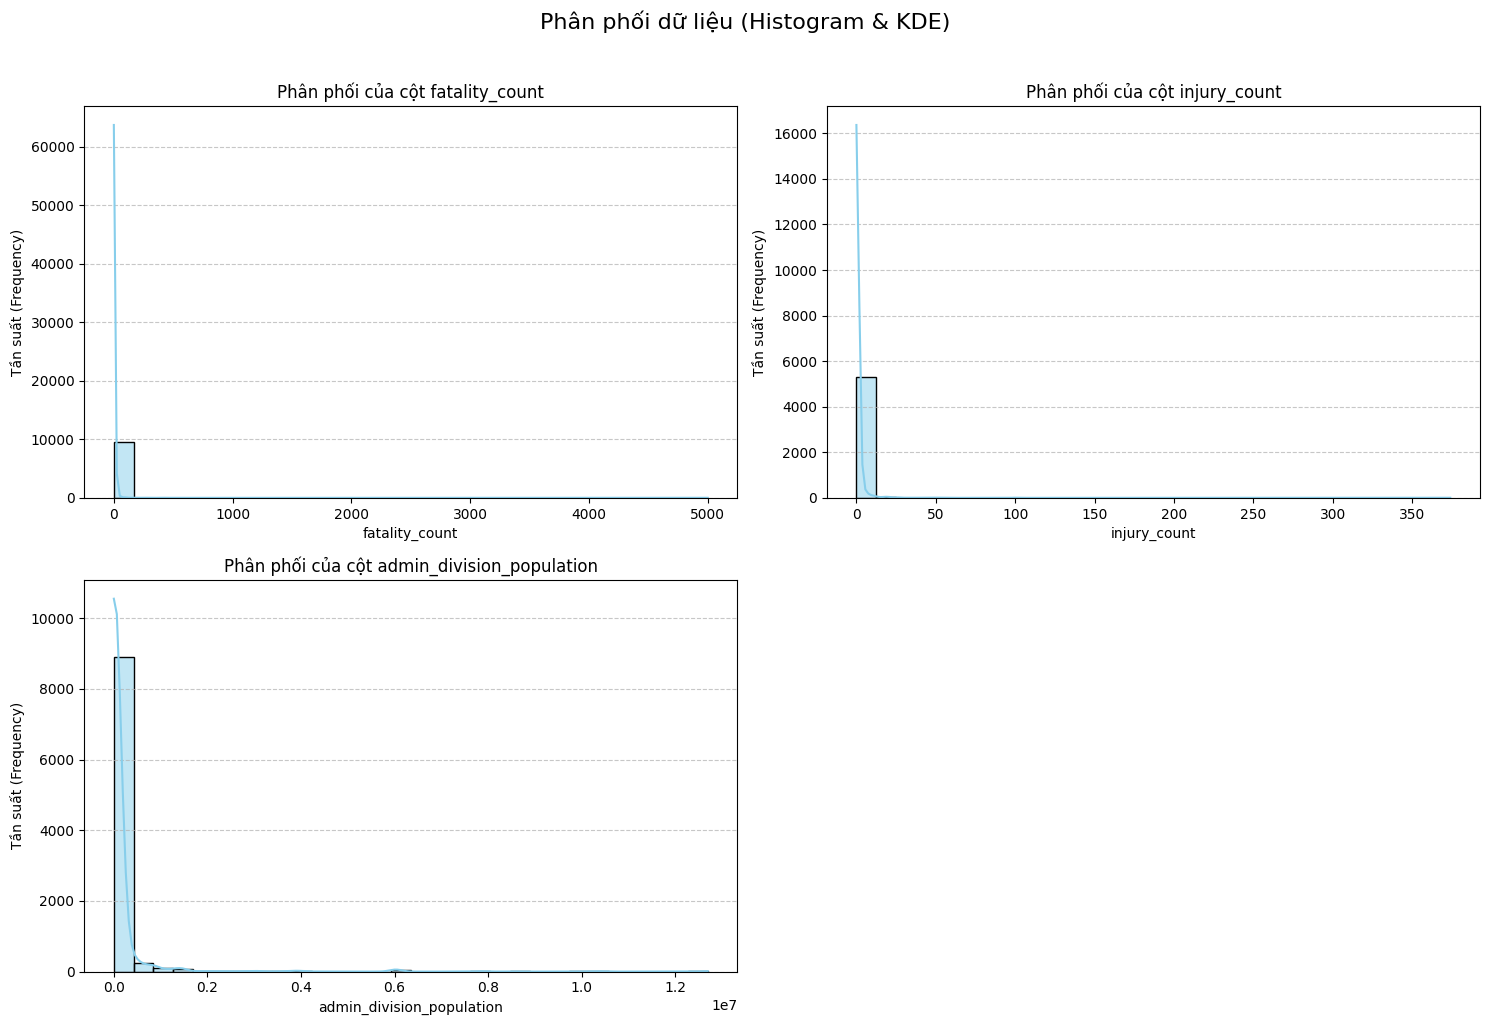

In [13]:
# 1. Danh sách các cột cần vẽ
cols_to_plot = [
    'fatality_count', 
    'injury_count', 
    'admin_division_population', 
]

n_cols = 2
n_rows = math.ceil(len(cols_to_plot) / n_cols)

plt.figure(figsize=(15, 5 * n_rows))
plt.suptitle('Phân phối dữ liệu (Histogram & KDE)', fontsize=16, y=1.02)

for i, col in enumerate(cols_to_plot):
    # Tạo vị trí cho từng biểu đồ
    ax = plt.subplot(n_rows, n_cols, i + 1)
    
    sns.histplot(df[col].dropna(), kde=True, bins=30, color='skyblue', edgecolor='black', ax=ax)
    
    # Trang trí
    plt.title(f'Phân phối của cột {col}')
    plt.xlabel(col)
    plt.ylabel('Tần suất (Frequency)')
    
    plt.grid(axis='y', linestyle='--', alpha=0.7)

# Xóa biểu đồ trống (nếu có) ở vị trí cuối cùng
if len(cols_to_plot) % n_cols != 0:
    plt.delaxes(plt.subplot(n_rows, n_cols, len(cols_to_plot) + 1))

plt.tight_layout()
plt.show()

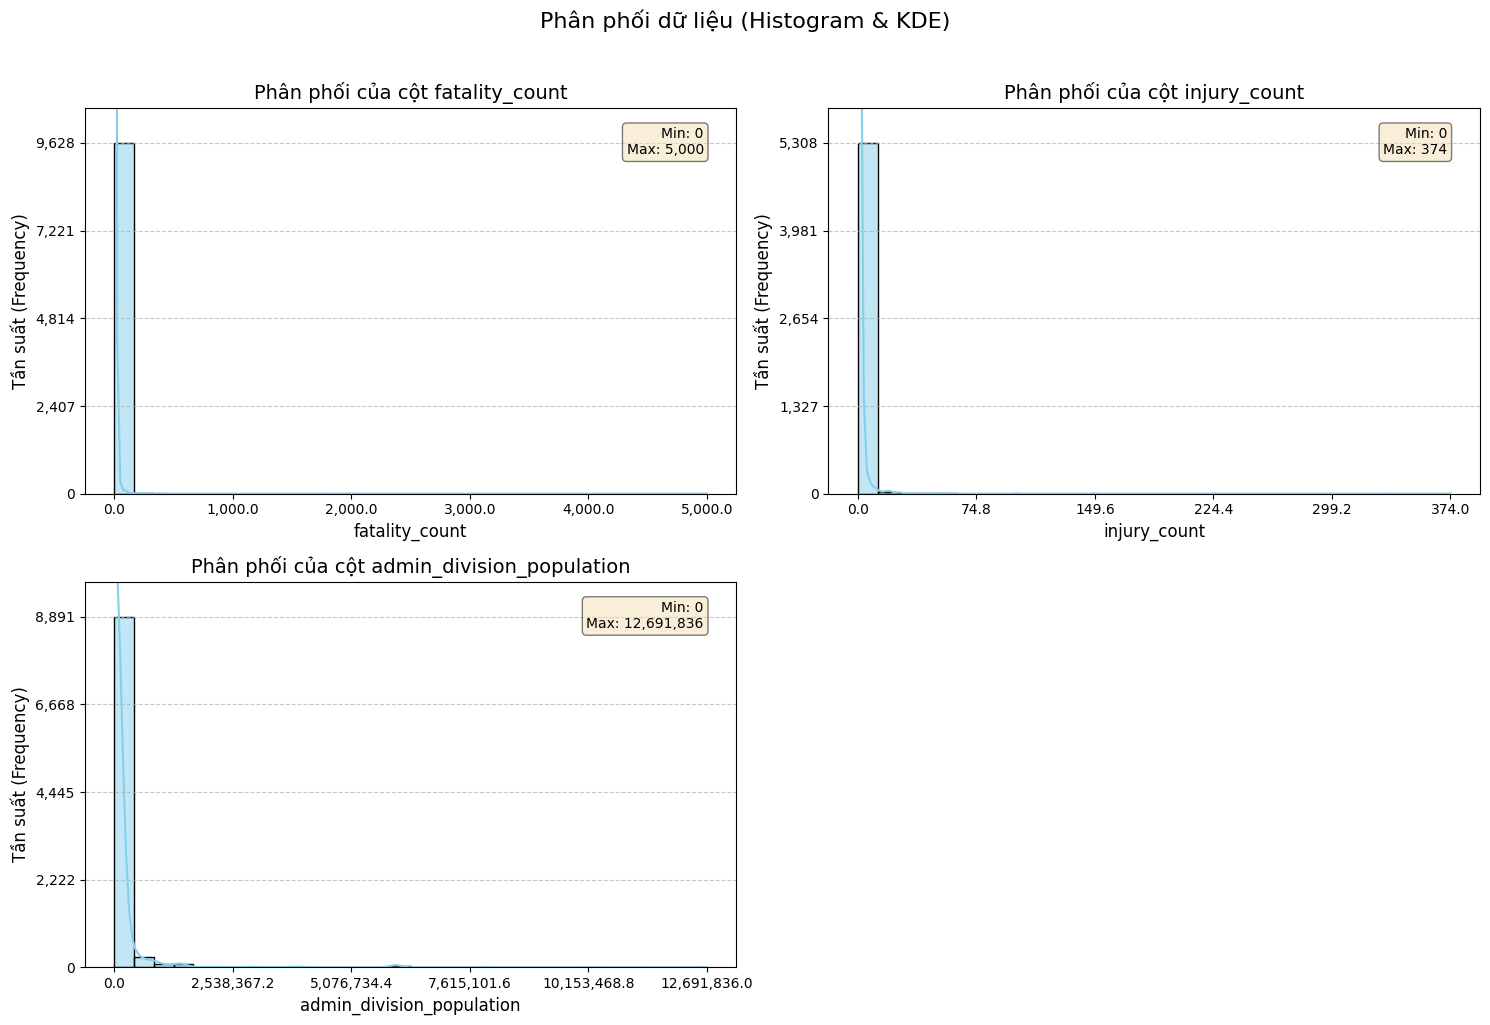

In [14]:
import math
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Danh sách các cột cần vẽ
cols_to_plot = [
    'fatality_count', 
    'injury_count', 
    'admin_division_population', 
]

n_cols = 2
n_rows = math.ceil(len(cols_to_plot) / n_cols)

plt.figure(figsize=(15, 5 * n_rows))
plt.suptitle('Phân phối dữ liệu (Histogram & KDE)', fontsize=16, y=1.02)

for i, col in enumerate(cols_to_plot):
    # Tạo vị trí cho từng biểu đồ
    ax = plt.subplot(n_rows, n_cols, i + 1)
    
    # Vẽ histogram
    sns.histplot(df[col].dropna(), kde=True, bins=30, color='skyblue', edgecolor='black', ax=ax)
    
    # ========== TÙY CHỈNH TRỤC X ==========
    # Lấy giá trị min, max của dữ liệu
    data_min = df[col].min()
    data_max = df[col].max()
    
    # Tạo các tick đẹp hơn cho trục X
    # Cách 1: Dùng numpy linspace để tạo khoảng cách đều
    x_ticks = np.linspace(data_min, data_max, num=6)  # 6 điểm chia
    ax.set_xticks(x_ticks)
    
    # Định dạng số cho đẹp (bỏ số thập phân nếu là số nguyên)
    if df[col].dtype in ['int64', 'int32']:
        ax.set_xticklabels([f'{int(x):,}' for x in x_ticks])
    else:
        ax.set_xticklabels([f'{x:,.1f}' for x in x_ticks])
    
    # ========== TÙY CHỈNH TRỤC Y ==========
    # Tự động xác định giới hạn trục Y dựa trên histogram
    # Lấy các patch (cột) của histogram
    patches = ax.patches
    if len(patches) > 0:
        max_height = max([p.get_height() for p in patches])
        # Đặt giới hạn trục Y cao hơn một chút so với cột cao nhất
        ax.set_ylim(0, max_height * 1.1)
        
        # Tạo các tick cho trục Y (5 điểm chia)
        y_ticks = np.linspace(0, max_height, num=5)
        ax.set_yticks(y_ticks)
        ax.set_yticklabels([f'{int(y):,}' for y in y_ticks])
    
    # Trang trí
    ax.set_title(f'Phân phối của cột {col}', fontsize=14)
    ax.set_xlabel(col, fontsize=12)
    ax.set_ylabel('Tần suất (Frequency)', fontsize=12)
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Thêm giá trị min, max vào tiêu đề hoặc text box
    ax.text(0.95, 0.95, f'Min: {data_min:,.0f}\nMax: {data_max:,.0f}',
            transform=ax.transAxes, fontsize=10,
            verticalalignment='top', horizontalalignment='right',
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# Xóa biểu đồ trống (nếu có) ở vị trí cuối cùng
if len(cols_to_plot) % n_cols != 0:
    plt.delaxes(plt.subplot(n_rows, n_cols, len(cols_to_plot) + 1))

plt.tight_layout()
plt.show()

#### Các biểu đồ trực quan

#### Tính toán các chỉ số cơ bản
trung bình (mean), trung vị (median), độ lệch chuẩn (standard deviation).

In [16]:
df.describe()

,event_date,fatality_count,injury_count,admin_division_population,longitude,latitude
count,11033,9648.000000,5359.000000,9.471000e+03,11033.000000,11033.000000
mean,2013-03-12 05:19:56.432520704,3.219424,0.751819,1.577600e+05,2.520441,25.881887
min,1988-11-07 00:00:00,0.000000,0.000000,0.000000e+00,-179.980766,-46.774800
25%,2010-11-09 00:00:00,0.000000,0.000000,1.963000e+03,-107.871700,13.917600
50%,2013-07-12 00:00:00,0.000000,0.000000,7.365000e+03,19.694600,30.534500
75%,2015-10-19 00:00:00,1.000000,0.000000,3.402100e+04,93.948000,40.866259
max,2017-09-28 19:36:00,5000.000000,374.000000,1.269184e+07,179.991364,72.627500
std,NaN,59.886178,8.458955,8.297345e+05,100.908393,20.415054


In [17]:
col_nunique = df.nunique()# Mỗi cột có bao nhiêu giá trị duy nhất
print(col_nunique)
for col in df.columns:
    if col_nunique[col] <= 150:
        print(f"Cột {col}:")
        print(df[col].unique())


source_name                   3918
event_id                     11033
event_date                    6550
event_title                  10549
event_description             9409
location_description         10435
location_accuracy                9
landslide_category              14
landslide_trigger               18
landslide_size                   6
landslide_setting               14
fatality_count                 105
injury_count                    42
country_name                   141
admin_division_name            887
admin_division_population     3496
longitude                    10744
latitude                     10657
dtype: int64
Cột location_accuracy:
['unknown' '5km' '10km' '25km' 'exact' '1km' '50km' nan '250km' '100km']
Cột landslide_category:
['landslide' 'mudslide' 'complex' 'rock_fall' 'debris_flow'
 'riverbank_collapse' 'other' 'unknown' 'lahar' 'snow_avalanche' 'creep'
 'earth_flow' 'translational_slide' nan 'topple']
Cột landslide_trigger:
['rain' 'downpour' 'monsoon' 't

In [18]:
print(df.injury_count[df.injury_count == 0])

11       0.0
13       0.0
42       0.0
53       0.0
57       0.0
        ... 
11027    0.0
11028    0.0
11029    0.0
11030    0.0
11032    0.0
Name: injury_count, Length: 4784, dtype: float64


### 

## Phân tích các cột phân loại

In [20]:
df.dtypes

source_name                          object
event_id                             object
event_date                   datetime64[ns]
event_title                          object
event_description                    object
location_description                 object
location_accuracy                    object
landslide_category                   object
landslide_trigger                    object
landslide_size                       object
landslide_setting                    object
fatality_count                      float64
injury_count                        float64
country_name                         object
admin_division_name                  object
admin_division_population           float64
longitude                           float64
latitude                            float64
dtype: object

## Phân tích các cột tọa độ
Xét 2 cột `longitude, latitude`

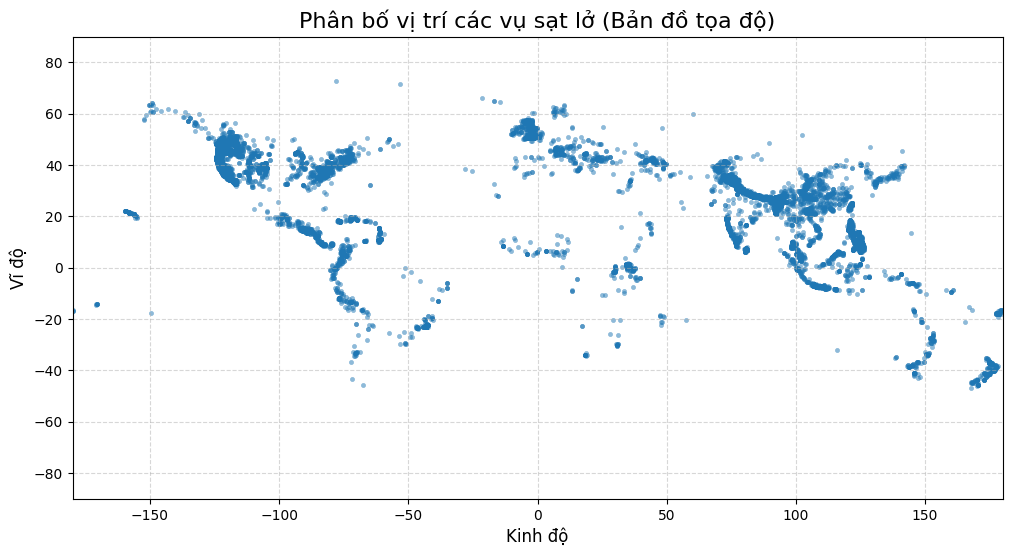

In [ ]:
plt.figure(figsize=(12, 6))

# Vẽ Scatter Plot: X là Kinh độ, Y là Vĩ độ
# hue='landslide_category': Tô màu theo loại sạt lở (tùy chọn)
sns.scatterplot(
    data=df, 
    x='longitude', 
    y='latitude', 
    alpha=0.5,       
    s=10,            
    edgecolor=None  
)

plt.title('Phân bố vị trí các vụ sạt lở (Bản đồ tọa độ)', fontsize=16)
plt.xlabel('Kinh độ', fontsize=12)
plt.ylabel('Vĩ độ', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)

# Giới hạn trục để loại bỏ các điểm nhiễu (nếu có)
plt.xlim(-180, 180)
plt.ylim(-90, 90)

plt.show()

In [24]:
print(f"Vĩ độ: min = {df.latitude.min():.2f}, max = {df.latitude.max():.2f}")
print(f"Kinh độ: min = {df.longitude.min():.2f}, max = {df.longitude.max():.2f}")

Vĩ độ: min = -46.77, max = 72.63
Kinh độ: min = -179.98, max = 179.99
